In [1]:
# IMPORT PACKAGES

import numpy as np
import glob
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu
import scipy.ndimage as ndimage
import cv2

In [80]:
# IMPORT SHG TIFs

path_imgs = r'Z:\JFD\P2_CellContractility\P2_SHG\Exp2p1 (E16WT+treat tile scane sfrom sma to edge)\CA\jun302021_DMSO_s2_square_tilescan1\*.tif'
imgs = []
for name_img in glob.glob(path_imgs):
    img = np.asarray(Image.open(name_img))
    imgs.append(img)

print(f'Loaded SHG images, with dimensions: {np.shape(imgs)}')

Loaded SHG images, with dimensions: (4, 3748, 2606)


In [81]:
# SMOOTH AND NORMALIZE

imgs_scaled = []
for img in imgs:
    if len(np.shape(imgs)) == 4:
        imgs_scaled.append(img[:,:,0])
    elif len(np.shape(imgs)) == 3:
        imgs_scaled.append(img)
    imgs_scaled[-1] = cv2.equalizeHist(imgs_scaled[-1])
    imgs_scaled[-1] = imgs_scaled[-1].astype(np.float32)
    imgs_scaled[-1] = ndimage.gaussian_filter(imgs_scaled[-1], sigma=(2, 2), order=0)
    imgs_scaled[-1] -= imgs_scaled[-1].min()
    imgs_scaled[-1] /= imgs_scaled[-1].max()
    # crop (to exclude alignment artifacts):
    imgs_scaled[-1] = imgs_scaled[-1][150:-150,150:-150]


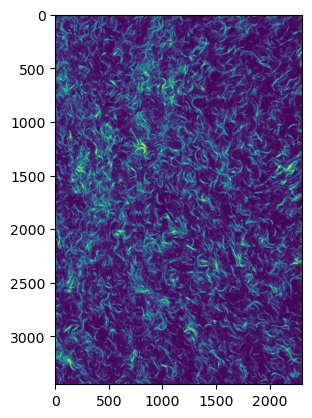

In [82]:
plt.imshow(imgs_scaled[0])

In [83]:
# BINARIZE IMAGES

# threshold images:
imgs_thresh = []
for img in imgs_scaled:
    thresholds = threshold_multiotsu(img, 2)
    regions = np.digitize(img, bins=thresholds)
    imgs_thresh.append(regions)

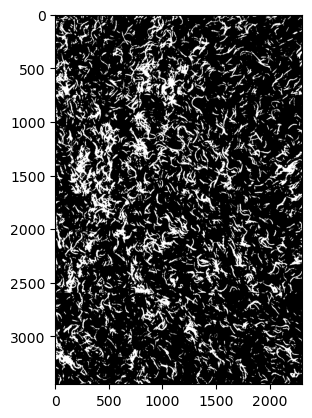

In [84]:
plt.imshow(imgs_thresh[0], cmap = "gray")

In [85]:
# CALCULATE RELATIVE FIBER DENSITY

# relative density = # px above threshold / # total px
density = np.sum(imgs_thresh) / (len(imgs_thresh) * len(imgs_thresh[0][:,0]) * len(imgs_thresh[0][0,:]))
print(f'Percentage of volume occupied by Collagen fibers: {round(density,3) * 100} %')

Percentage of volume occupied by Collagen fibers: 17.2 %
